# Image visualization with stackview
In this notebook we will learn how to visualize images using [stackview](https://github.com/haesleinhuepf/stackview).

Most of the tools used here will not render in the website. You must execute this notebook locally to make use of stackview.

## Usage
You can use `stackview` from within jupyter notebooks as shown below.

In [1]:
import stackview

In [2]:
from skimage.io import imread, imshow

First we load an example image. The ´imread´ function allows to open common file formats such as TIF. To get a first glimps about the data, we print out its dimensionality using ´.shape´.

In [3]:
image = imread("../day2.1_image_segmentation/data/BMP4blastocystC3-cropped_resampled_8bit.tif")
image.shape

(86, 396, 393)

A common way for visualizing images is using the `imshow` function. It only works for 2D images and thus, we need to select a slice, for example the center slice.

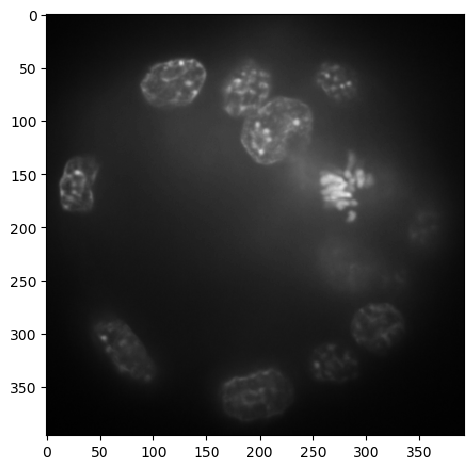

In [4]:
center_slice = int(image.shape[0] / 2)

imshow(image[center_slice])

To get better overview about the image, its size and pixel intensity distribution, we use the `stackview.insight` function. Note that this is a 3D image. We are looking at a maximum intensity projection along the z-axis.

StackViewNDArray([[[19, 19, 19, ..., 19, 18, 19],
                   [19, 19, 20, ..., 19, 19, 18],
                   [19, 19, 20, ..., 19, 19, 18],
                   ...,
                   [ 7,  9,  8, ...,  5,  5,  5],
                   [ 8,  8,  8, ...,  5,  5,  6],
                   [ 7,  8,  8, ...,  5,  5,  5]],

                  [[18, 19, 19, ..., 18, 18, 18],
                   [19, 18, 19, ..., 18, 18, 18],
                   [19, 19, 19, ..., 18, 18, 19],
                   ...,
                   [ 8,  8,  8, ...,  5,  5,  4],
                   [ 7,  8,  8, ...,  6,  5,  4],
                   [ 8,  8,  7, ...,  5,  5,  5]],

                  [[18, 18, 19, ..., 18, 18, 18],
                   [18, 18, 19, ..., 18, 18, 18],
                   [17, 18, 18, ..., 18, 18, 18],
                   ...,
                   [ 7,  8,  8, ...,  5,  5,  5],
                   [ 7,  8,  8, ...,  5,  5,  5],
                   [ 8,  8,  7, ...,  5,  5,  4]],

                  ...,

                  [[ 0,  1,  1, ...,  2,  1,  2],
                   [ 0,  1,  1, ...,  2,  2,  2],
                   [ 1,  1,  1, ...,  2,  2,  2],
                   ...,
                   [ 0,  1,  1, ...,  1,  1,  2],
                   [ 0,  1,  1, ...,  2,  2,  1],
                   [ 0,  0,  1, ...,  2,  2,  1]],

                  [[ 1,  1,  1, ...,  2,  2,  2],
                   [ 1,  1,  1, ...,  2,  2,  2],
                   [ 1,  1,  2, ...,  2,  2,  2],
                   ...,
                   [ 1,  0,  1, ...,  2,  2,  2],
                   [ 1,  1,  1, ...,  2,  2,  2],
                   [ 1,  1,  1, ...,  2,  2,  1]],

                  [[ 2,  1,  1, ...,  2,  3,  2],
                   [ 1,  1,  1, ...,  2,  2,  2],
                   [ 1,  1,  2, ...,  1,  2,  2],
                   ...,
                   [ 1,  1,  1, ...,  2,  2,  2],
                   [ 1,  1,  1, ...,  2,  2,  2],
                   [ 1,  0,  1, ...,  2,  2,  2]]], dtype=uint8)
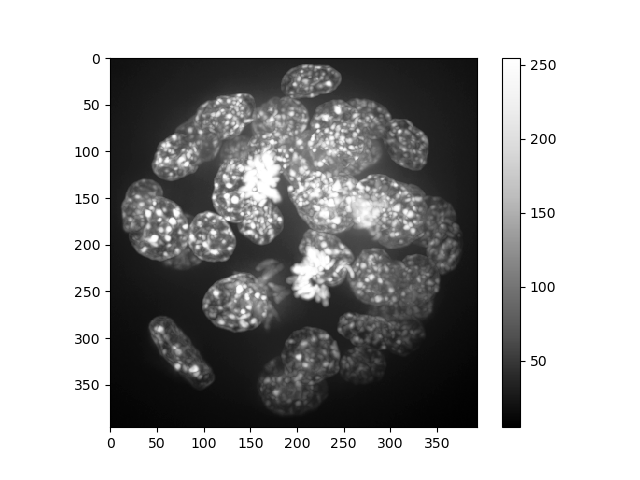
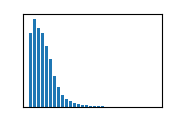

In [5]:
stackview.insight(image)

## Slice
You can also view it slice-by-slice. Note: This view will not render on the course website. You need to run the code locally or on the Jupyter-Hub of your institute, e.g. at [Uni-Leipzig](https://lab.sc.uni-leipzig.de/).

In [6]:
stackview.slice(image)

## Picker
To read the intensity of pixels where the mouse is moving, use the picker.

In [7]:
stackview.picker(image)

## Curtain
For visualization of an original image in combination with segmented image, the ´curtain´ may be helpful. Note: This segmentation just serves as example. We can do much better than that.

In [8]:
binary_image = image > 80

In [9]:
stackview.curtain(image, binary_image)

The curtain can also be partially transparent using the alpha value.

In [10]:
stackview.curtain(image, binary_image, alpha=0.3)

The curtain also works with 2D data

## Switch
If there are many images you would like to inspect, for example fluorescent channels, you can pass them as dictionary or list to `switch()`.

In [11]:
hela_cells = imread("../data/hela-cells.tif")
hela_cells.shape

(512, 672, 3)

From ´.shape´ we can read the dimensions of the image. Obvisouly, this image has three channels. We can extract these channels using what we learned about arrays: indexing.

StackViewNDArray([[179, 167, 178, ..., 182, 187, 189],
                  [173, 175, 172, ..., 190, 188, 184],
                  [175, 173, 172, ..., 182, 187, 186],
                  ...,
                  [246, 245, 240, ..., 214, 208, 212],
                  [242, 240, 247, ..., 210, 211, 215],
                  [242, 247, 253, ..., 214, 217, 214]], dtype=uint16)
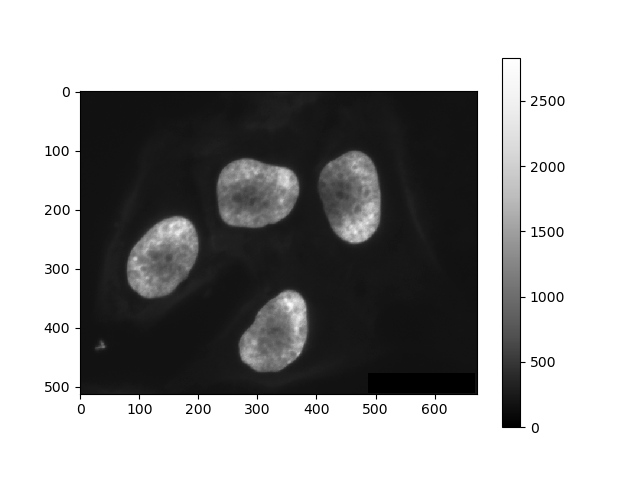
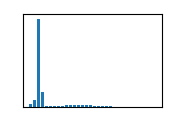

In [12]:
# take the time and give variables good names.
# For example, when extracting channels, give them biologically meaningful names
lysosomes_channel = hela_cells[:,:,0]
mitochondria_channel = hela_cells[:,:,1]
nuclei_channel = hela_cells[:,:,2]

# and check that the name make sense.
stackview.insight(nuclei_channel)

Then, we can pass the channel images and corresponding descriptive names.

In [13]:
stackview.switch(
    {
        "Lysosomes":   lysosomes_channel,
        "Mitochondria":mitochondria_channel,
        "Nuclei":      nuclei_channel
    }
)

You can also configure corresponding color maps and show multiple channels at a time. You find an overview about possible colormaps [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html). Additionally, color maps called `pure_` and a color are available.

In [14]:
stackview.switch(
    {
        "Lysosomes":   lysosomes_channel,
        "Mitochondria":mitochondria_channel,
        "Nuclei":      nuclei_channel
    },
    colormap=[
        "pure_magenta", 
        "pure_green", 
        "pure_blue"
    ],
    toggleable=True
)

## Exercise 1
Modify the code above to visualize the Hela nuclei in red and the mitochondria in cyan.

## Exercise 2
Use the picker tool to get an idea about the intensity in the nuclei.

## Optional Exercise:
Open an own multi-channel file and visualize its content.